In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import mean_squared_error, accuracy_score

np.random.seed(20)  

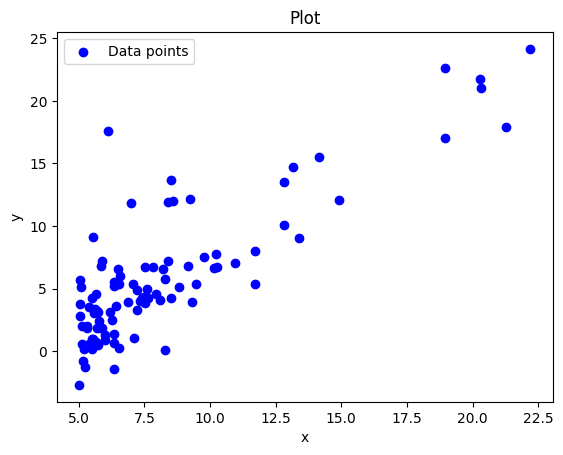

In [37]:
data = np.loadtxt('data2.txt', delimiter=',')

X = data[:, 0].reshape(-1, 1)
y = data[:, 1]

plt.scatter(X, y, color='blue', label='Data points')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot')
plt.legend()
plt.show()



In [38]:
# Method 1: Normal Equation

# bias term (x0 = 1)
X_b = np.c_[np.ones((len(X), 1)), X]

# Create list of ids
indices = np.arange(len(X_b))

# Shuffle (This is for randomizing the IDs)
train_size = int(0.8 * len(indices))   # 80% for training
train_idx, test_idx = indices[:train_size], indices[train_size:]

# Relate IDs to the data
X_train, X_test = X_b[train_idx], X_b[test_idx]
y_train, y_test = y[train_idx], y[test_idx]

# Normal Equation for Linear Regression
# Represents the closed-form solution for the linear regression parameters (Theta = (X^T * X)^-1 * X^T * y)
theta_normal = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train 

# theta_normal holds w_0 and w_1 (bias (intercept) and slope (weight/coefficient))
print(theta_normal)

# Predict the values (y = X_b * Theta)
y_pred_train = X_train @ theta_normal
y_pred_test = X_test @ theta_normal

# Function to calculate Mean Squared Error
def mse(y_true, y_pred):
    errors = y_true - y_pred            
    squared_errors = errors ** 2        
    mse = np.mean(squared_errors)       
    return mse


mse_train = mse(y_train, y_pred_train)
mse_test = mse(y_test, y_pred_test)
print(f"Train MSE: {mse_train:.3f}, Test MSE: {mse_test:.3f}")


[-3.63963925  1.19367575]
Train MSE: 9.653, Test MSE: 6.593


In [39]:
# Method 2: Stochastic Gradient Descent

# Stochastic Gradient Descent Function
# alpha = learning rate ; max_iter = maximum number of iterations ; tol = tolerance (when to stop)
def stochastic_gradient_descent(X_train, y_train, X_test, y_test, alpha = 0.01, max_iter = 1000, tol=1e-6):
    m, n = X_train.shape   # m = # of samples ; n = # of features 
    theta = np.zeros(n)    # weights are [0, 0] essentially our equation is y = 0 + 0*x
    mse_train_hist, mse_test_hist = [], []

    for i in range(max_iter):   # Within allowable iterations
        for j in range(m):      # For each sample
            idx = np.random.randint(m)   # Randomly select a sample
            xi = X_train[idx]           
            yi = y_train[idx]           

            # Calculate error and gradient
            error = (xi @ theta - yi)
            gradient = xi * error
            theta -= alpha * gradient

        # Check how the model performes and store the results
        y_pred_train = X_train @ theta
        y_pred_test = X_test @ theta

        mse_train = mse(y_train, y_pred_train)
        mse_test = mse(y_test, y_pred_test)

        mse_train_hist.append(mse_train)
        mse_test_hist.append(mse_test)

        # If the model doesn't improve by much, break out and end the loop
        if len(mse_train_hist) > 1 and abs(mse_train_hist[-1] - mse_train_hist[-2]) < tol:
            break
    
    return theta, mse_train_hist, mse_test_hist

Best learning rate (SGD): 0.01


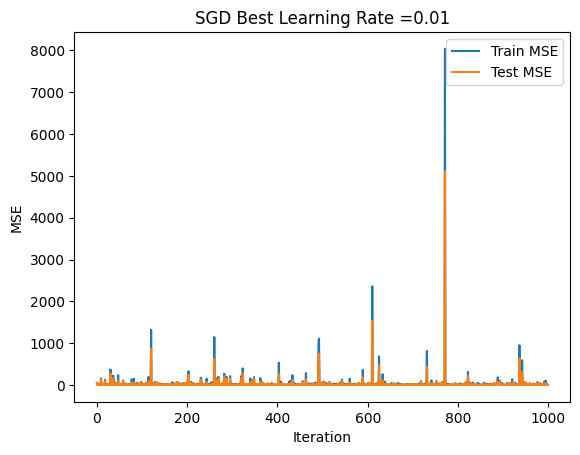

In [40]:
learning_rates = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01]

results = {}
for lr in learning_rates:
    theta, mse_train_hist, mse_test_hist = stochastic_gradient_descent(X_train, y_train, X_test, y_test, alpha=lr)
    results[lr] = (mse_test_hist[-1], theta)

# Find the best learning rate (learning rate : (test MSE, theta)) we are finding the lowest MSE
best = min(results, key=lambda k: results[k][0])

print(f"Best learning rate (SGD): {best}")

# Plot MSE vs Iterations for the best learning rate
theta, mse_train_hist, mse_test_hist = stochastic_gradient_descent(X_train, y_train, X_test, y_test, alpha=best)
plt.plot(mse_train_hist, label='Train MSE')
plt.plot(mse_test_hist, label='Test MSE')
plt.title(f'SGD Best Learning Rate ={best}')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [41]:
# Method 3: Batch Gradient Descent

def BGD(X_train, y_train, X_test, y_test, alpha = 0.01, max_iter = 1000, tol=1e-6):
    m, n = X_train.shape
    theta = np.zeros(n)  # Initialize theta to 0
    mse_train_hist, mse_test_hist = [], []

    # Gradient Descent Loop
    for i in range(max_iter):
        gradient = 1/m * X_train.T @ (X_train @ theta - y_train) 
        # Update theta
        theta -= alpha * gradient

        # Predict values
        y_pred_train = X_train @ theta
        y_pred_test = X_test @ theta

        # Calculate MSE
        mse_train = mse(y_train, y_pred_train)
        mse_test = mse(y_test, y_pred_test)

        # Store results
        mse_train_hist.append(mse_train)
        mse_test_hist.append(mse_test)

        if len(mse_train_hist) > 1 and abs(mse_train_hist[-1] - mse_train_hist[-2]) < tol:
            break
    
    return theta, mse_train_hist, mse_test_hist

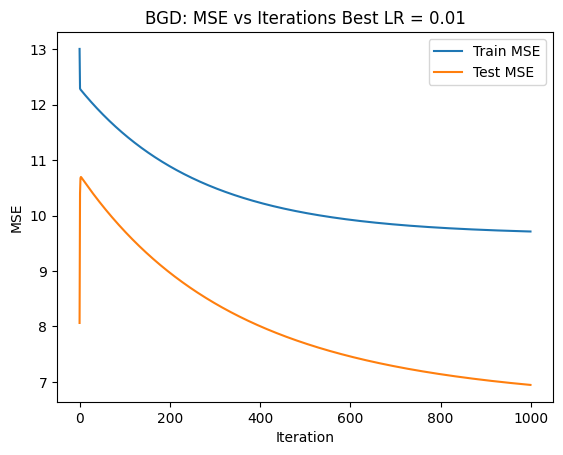

SGD Test MSE: 4.957112897831581
BGD Test MSE: 6.9445317511830975


In [43]:
theta_bgd, mse_train_hist_bgd, mse_test_hist_bgd = BGD(X_train, y_train, X_test, y_test, alpha=best)

plt.plot(mse_train_hist_bgd, label='Train MSE')
plt.plot(mse_test_hist_bgd, label='Test MSE')
plt.title(f'BGD: MSE vs Iterations Best LR = {best}')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.legend()
plt.show()


print("SGD Test MSE:", mse_test_hist[-1])
print("BGD Test MSE:", mse_test_hist_bgd[-1])

##### Discussion
The SGD plot had the blue and orange lines fluctuating up and down (Train/Test MSE), which is expected as SGD updates the weights using one random point at a time. It does eventually find a good minimum, as shown by the low final MSE of 4.957. 

The BGD plot shows the MSE steadily and gradually improving. This is due to the fact the BGD uses all training samples together in every update producing an average gradient. It converges slowly but consistently. 

SGD reaches a low MSE quickly but with high fluctuations (noise)
BGD is stable, but slower as it processes the entire dataset every time 
SGD is the better overall model for accuracy, while BGD has a MSE of 6.955 which means it will generalize worse to unseen data as compared to SGD.

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegressionCV

In [64]:
# Question 2

import pandas as pd

cols = [
    'id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
    'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
    'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
    'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
    'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
    'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
    'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst',
    'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst'
]

df = pd.read_csv("breast+cancer+wisconsin+diagnostic/wdbc.data", names=cols)

# Convert the diagnosis column to numeric M = 1, B = 0
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
df = df.drop(columns=['id'])  # ID column isn't needed

df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [65]:
# Extract Features and Target
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

# Split Data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize Features because the scales for the different features are different
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Train Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Evaluate
y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred), end="\n\n")
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred), end="\n\n")
print("Classification report:\n", classification_report(y_test, y_pred), end="\n\n")


Accuracy: 0.9736842105263158

Confusion matrix:
 [[70  1]
 [ 2 41]]

Classification report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114




In [ ]:
# L1 Penalty
logreg_cv_l1 = LogisticRegressionCV(
    Cs=10,
    cv=5,
    penalty='l1',
    solver='liblinear',      
    max_iter=1000,
    scoring='accuracy',
    random_state=42
)
logreg_cv_l1.fit(X_train_scaled, y_train)

print("Test accuracy:", logreg_cv_l1.score(X_test_scaled, y_test))

# Calculate Lambda from the best C ; C = 1/lambda
lambda1 = 1/logreg_cv_l1.C_[0]
print("Lambda1:", lambda1)

# Shows the weights for each feature
print(logreg_cv_l1.coef_[0])


Test accuracy: 0.9736842105263158
Lambda1: 2.782559402207126
[ 0.          0.02406105  0.          0.          0.          0.
  0.          1.30849298  0.          0.          1.3568638   0.
  0.          0.          0.         -0.10282966  0.          0.
  0.         -0.26563327  2.38457025  1.20615834  0.          0.94568745
  0.47371178  0.          0.60467909  0.23276738  0.44751473  0.        ]


In [ ]:
# L2 Penalty
logreg_cv_l2 = LogisticRegressionCV(
    Cs=10,                   
    cv=5,                    
    penalty='l2',            
    solver='lbfgs',          
    max_iter=1000,
    scoring='accuracy',
    random_state=42
)
logreg_cv_l2.fit(X_train_scaled, y_train)

print("Test accuracy:", logreg_cv_l2.score(X_test_scaled, y_test))

lambda2 = 1/logreg_cv_l2.C_[0]
print("Lambda2:", lambda2)

# Shows the weights for each feature
print(logreg_cv_l2.coef_[0])

Test accuracy: 0.9736842105263158
Lambda2: 0.3593813663804626
[ 0.32218736  0.19888544  0.24791832  0.39770957 -0.01666721 -1.11077251
  1.0711211   1.78767623 -0.47431223  0.21902261  1.94011054 -0.34884196
  0.5895932   1.39263401  0.50108373 -0.69885863 -0.50547074  0.49791237
 -0.73712965 -0.86779248  1.15576208  1.89343003  0.53428615  1.16453677
  0.45316355 -0.1097716   1.38612154  0.90388176  1.70710135  0.13049459]


In [ ]:
import numpy as np
l1_features = np.sum(np.abs(logreg_cv_l1.coef_[0]) > 1e-5)
l2_features = np.sum(np.abs(logreg_cv_l2.coef_[0]) > 1e-5)
baseline_features = X_train.shape[1]  # All features used

print(f"Baseline model uses: {baseline_features} features")
print(f"L1 regularization uses: {l1_features} features")
print(f"L2 regularization uses: {l2_features} features")

Baseline model uses: 30 features
L1 regularization uses: 12 features
L2 regularization uses: 30 features


All three models perform similiary with an accuarcy of 97.4%
This can reveal several things about the data:
- Features are well described and seperated (EX: two qualities don't overlap)
- Model already generalizes well enough that regularization doesn't make much of an effect

The lambda of the first model was 2.78, while the L2 model's had a value of 0.36, so L1 applies a heavier shrink to the weights making them close to 0, while L2 keeps all the features and smoothes them down. (As shown with the logreg_cv_l1.coef_[0] and logreg_cv_l2.coef_[0]). Which means the the L1 coefficients can show what are the most important features.

In addition I had restricted the model to using only 5 columns of data for interpretation, hoping that I would see a variance in the test accuracy, however I did not measure a notable different in their performance. Furthermore, I suspect that the StandardScaler() had a large effect on the performance of the models, leading them to all have a similiar accuracy, however removing it prevented the models from converging within the given iterations.